# Job 1
<b>Number of lethal accidents per week throughout the entire dataset</b>

After the required imports, let's read the dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

ds = pd.read_csv("NYPD_Motor_Vehicle_CollisionsPROC.csv")
ds.shape

(955928, 29)

In order to go on, we need to define a year-week key, used in the analisys. Let's create it and add it into the existing dataframe.

In [2]:
weeks = []

for index, row in ds.iterrows():    
    date = row.iloc[0]
    day = date.split('/')[1]
    month = date.split('/')[0]
    year = date.split('/')[2]
    dt = datetime.date(int(year), int(month), int(day)) 
    wk = dt.isocalendar()[1]
    
    if(int(month)==1 and (wk==53 or wk==52)):
        newyear = int(year)-1
        year=str(newyear)
    
    if(int(month)==12 and wk==1):
        newyear = int(year)+1
        year=str(newyear)
    
    wy = year+'-'+str(wk)
    weeks.append(wy)
    
ds['WEEKYEAR']=weeks
ds.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,WEEKYEAR
0,03/12/2016,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",VARICK STREET,SPRING STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-10
1,03/13/2016,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",WEST STREET,MURRAY STREET,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-10
2,03/14/2016,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",JOHN STREET,FRONT STREET,NaN,0,0,0,0,0,0,0,0,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),NaN,NaN,NaN,2016-11
3,03/14/2016,10:20,NaN,NaN,NaN,NaN,NaN,WATER STREET,FULTON STREET,NaN,0,0,0,0,0,0,0,0,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,3405178,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2016-11
4,03/14/2016,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",NaN,NaN,120 WALL STREET,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-11


Now that we have the weeks, we can select for each week the relative portion of dataset and sum up to get the number of lethal accidents.

In [3]:
keys = ds['WEEKYEAR'].unique()

cfdf = pd.DataFrame(index = keys)
cfdf['SUM']=np.zeros(len(keys))

c = 1

for k in keys:
    tempds = ds[ds['WEEKYEAR'] == k]
    sum = tempds['NUMBER OF PERSONS KILLED'].astype('bool').sum()
    cfdf.loc[k]['SUM'] = sum

cfdf.sort_index(inplace=True)

cfdf.head(5)

,SUM
2012-26,0.0
2012-27,4.0
2012-28,5.0
2012-29,6.0
2012-30,1.0


Let's do some analisys. We would to plot the lethal accidents trend troughout the different years we have in the dataset, trying to stop some sort of regularity. Let's define two useful function and then plots the trends.

In [4]:
def addMissingWeeks(int, ydf):
    kvect = []
    for i in range(1,53):
        kvect.append(str(int)+'-'+str(i))

    ndf = pd.DataFrame(index = kvect)
    ndf['SUM']=np.zeros(52)

    ndf = ndf.merge(ydf,left_on=ndf.index.values, right_on=ydf.index.values, how='left')
    ndf = ndf.drop('SUM_x', 1)
    ndf.fillna(value=0, axis=1, inplace=True)
    return ndf

def plotScatter(df):
    max = int(df['SUM_y'].max())
    max_index = df[df['SUM_y']==max].index.values
    if(len(max_index)>1):
        max = np.full(len(max_index),max)
        
    mean = np.full(len(df.index),int(df['SUM_y'].mean()))
        
    fig,ax = plt.subplots(figsize=(18,8))
        
    ax.plot(range(len(df.index)), mean, label='Mean', linestyle='--')
    ax.legend(loc='upper right')
    
    #plt.figure(1, figsize=(18,8))
    ax.scatter(range(len(df.index)),df['SUM_y'])
    ax.plot(range(len(df.index)),df['SUM_y'])
    ax.plot(max_index, max, 'r+', mew=5, ms=10) 
    plt.xticks(range(len(df.index)), df['key_0'], rotation='vertical')
    if(len(max_index)>1):
        plt.yticks(range(0,max[0]+1))
    else:
        plt.yticks(range(0,max+1))
    plt.show()
    
def plotHist(x,y):
    X = np.arange(len(x))
    x = np.array(x)
    y = np.array(y)

    plt.figure(1, figsize=(18,8))
    plt.ylabel('Total Lethal Accidents')
    plt.title('Number of accidents for year')
    plt.xticks(X, x, rotation='vertical')
    plt.bar(X, y)
    
    plt.show()

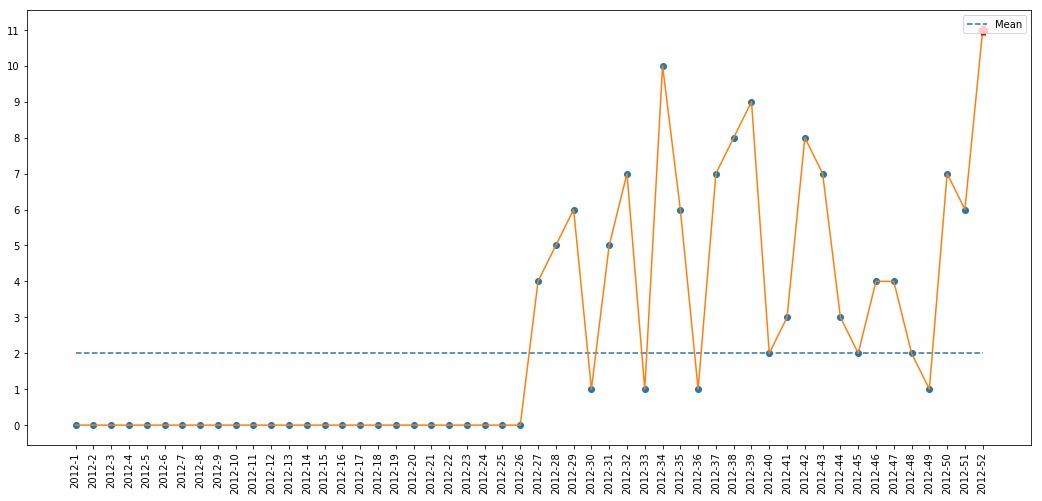

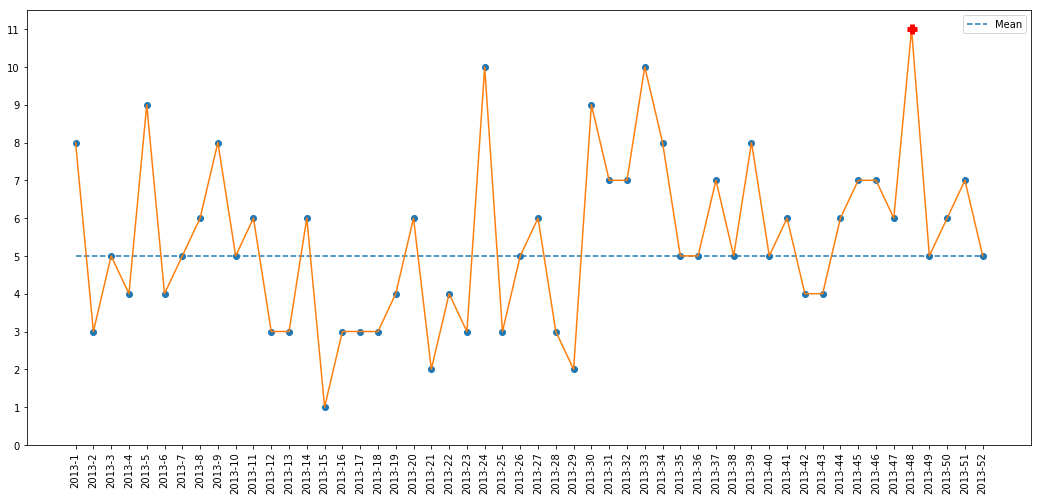

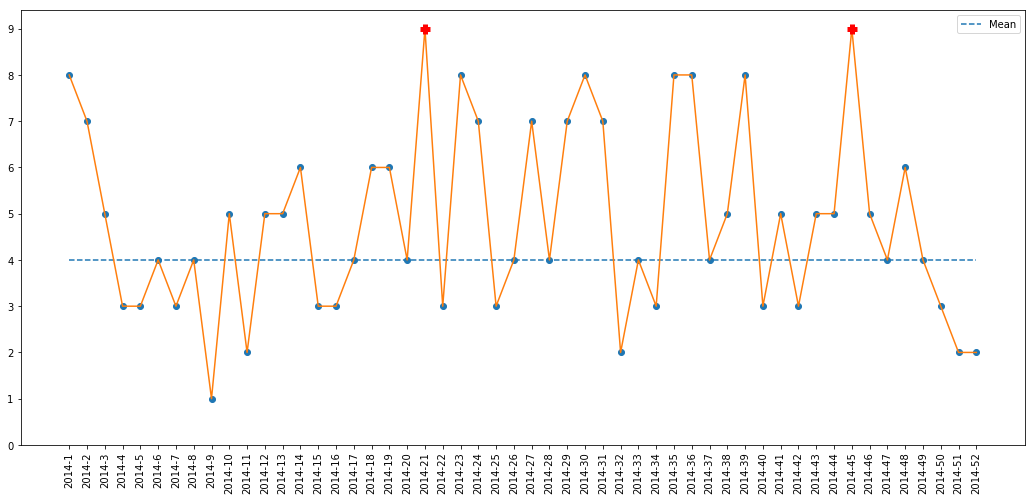

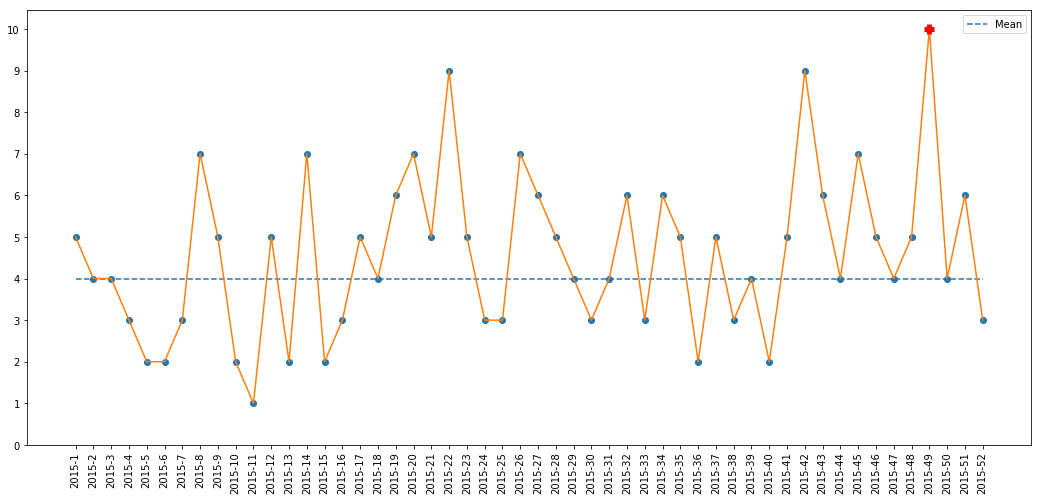

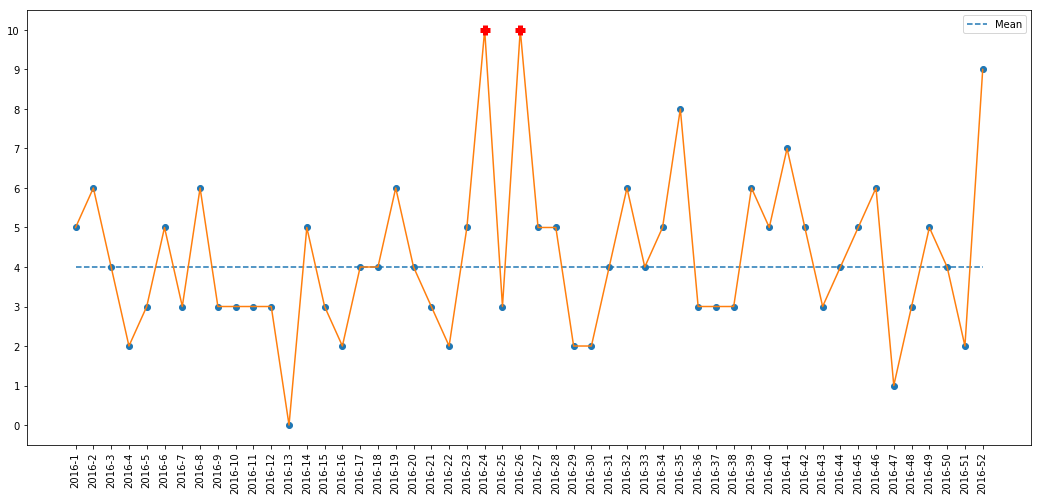

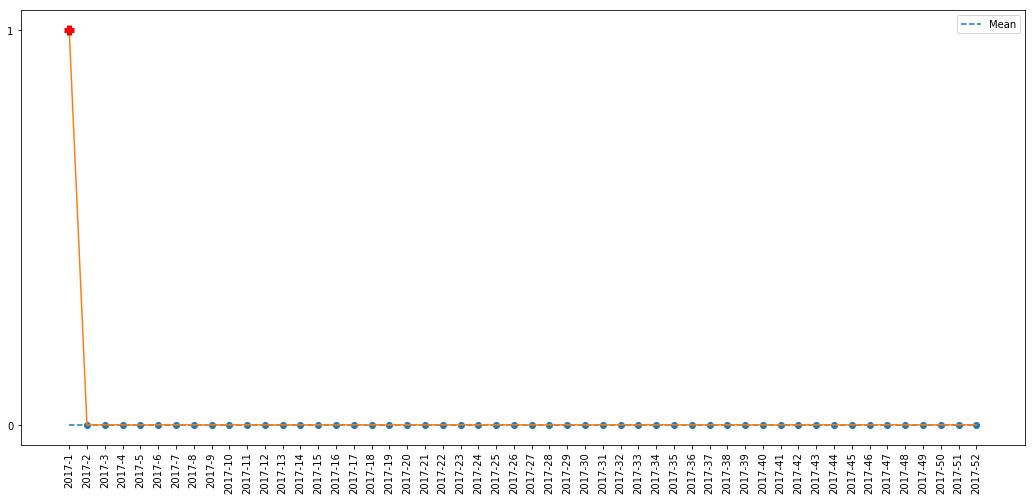

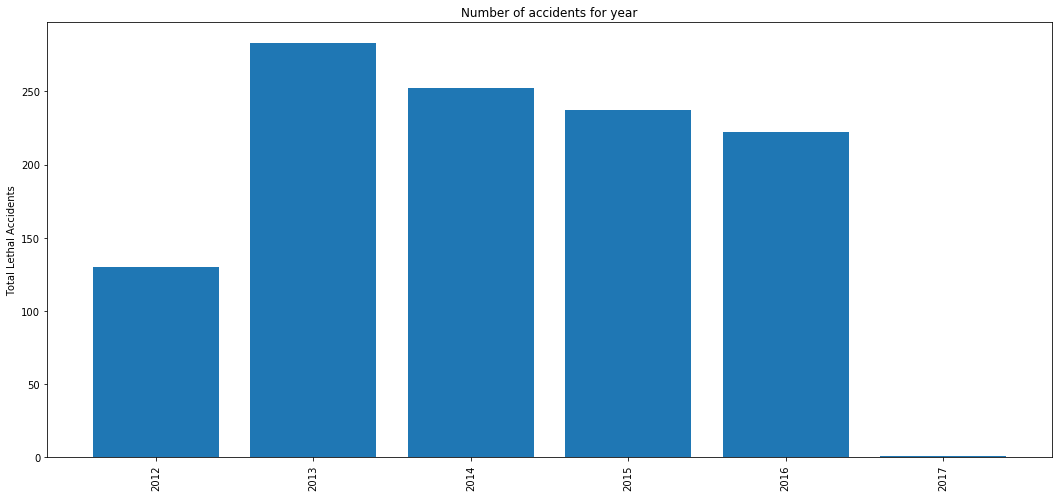

In [5]:
years = np.array([2012,2013,2014,2015,2016,2017])
total_lethal_accidents = []

for year in years:
    df_year = cfdf[cfdf.index.str.contains(str(year))]
    total_lethal_accidents.append(df_year['SUM'].sum())
    mdf = addMissingWeeks(year,df_year)
    plotScatter(mdf)

total_lethal_accidents = np.array(total_lethal_accidents)
plotHist(years, total_lethal_accidents)

<b>Excluding the first and the last year, due to their incompleteness, we can spot that all the years have some sort of regularity: there are peaks of lethal accidents in the middle of the year, let's say between weeks 21-24, and coming to the end of the year. The reasons could be easy addressable to the traffic due to american festivities, for which friends and families group together. Regarding the mean, excluding the lower ones of the first and last incomplete years, it behaves quite the same. The total lethal accidents instead (fortunately) decrease every year.</b>

In [ ]:
writer = pd.ExcelWriter('outj1.xlsx')
cfdf.to_excel(writer,'Sheet1')
writer.save()